In [33]:
#gerekli kütüphaneleri alıyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [34]:
#veri setini CSV uzantılı dosyadan aldık
data = pd.read_csv("dataset_Facebook.csv", delimiter=';')


In [35]:
# DataFrame'deki tüm sütun isimlerini al
tum_sutunlar = data.columns.tolist()

# Tüm sütun isimlerini ekrana yazdır
print(tum_sutunlar)

['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions']


In [36]:
# Kullanılmayan sütunları belirle (örneğin, kullanılmayan_sutun_1, kullanılmayan_sutun_2)
kullanilmayan_sutunlar =[] 


# Kullanılmayan sütunları veri setinden sil
data = data.drop(kullanilmayan_sutunlar, axis=1)
# Değişiklikleri kaydet
#data.to_csv('dataset_Facebook.csv', index=False)  # index=False ile indeksi kaydetmez


In [37]:
#verileri kontrol edilip boşlukları ortalama değer ile doldurma kısmı 
print(data.isnull().sum())
numeric_columns = data.select_dtypes(include='number').columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [38]:
#bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirledik
X = data[['Category', 'Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid','Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share']]
y = data['Total Interactions']


# Yeni veri setini gözden geçir
print(data.head())

   Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441   Photo         2          12             4          3   
1            139441  Status         2          12             3         10   
2            139441   Photo         3          12             3          3   
3            139441   Photo         2          12             2         10   
4            139441   Photo         2          12             2          3   

   Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0   0.0                       2752                             5091   
1   0.0                      10460                            19057   
2   0.0                       2413                             4373   
3   1.0                      50128                            87991   
4   0.0                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0                     178                      109

In [39]:
data['Category'].value_counts()
data['Page total likes'].value_counts()
data['Post Month'].value_counts()
data['Post Hour'].value_counts()
data['Post Weekday'].value_counts()
data['Paid'].value_counts()

0.000000    360
1.000000    139
0.278557      1
Name: Paid, dtype: int64

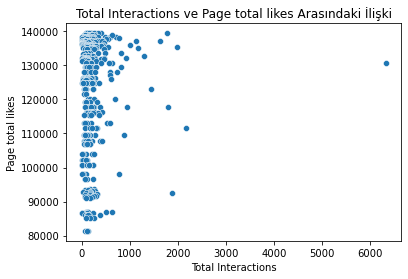

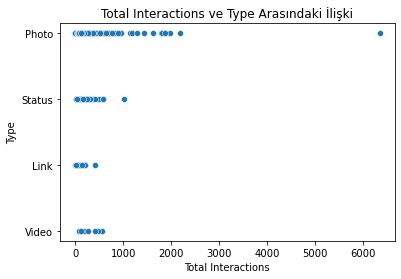

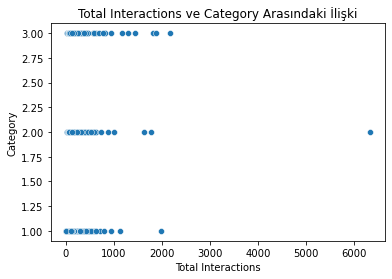

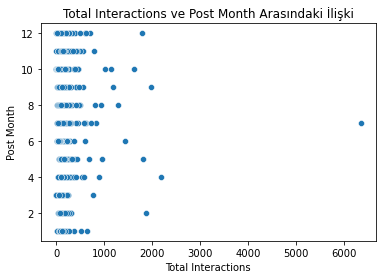

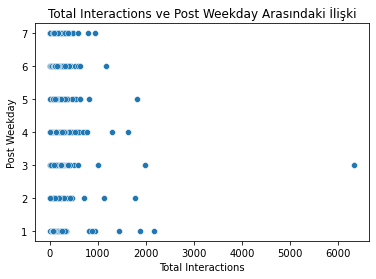

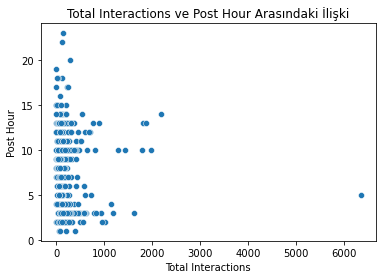

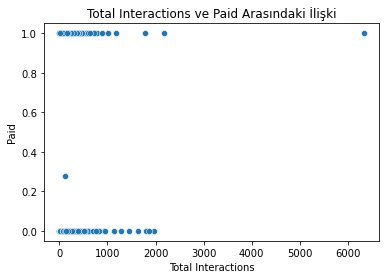

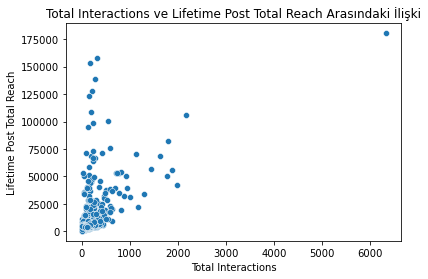

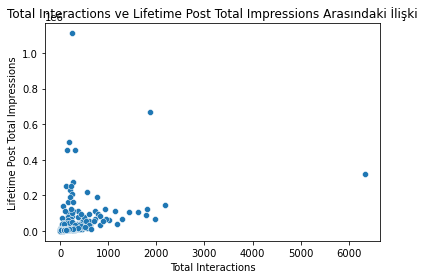

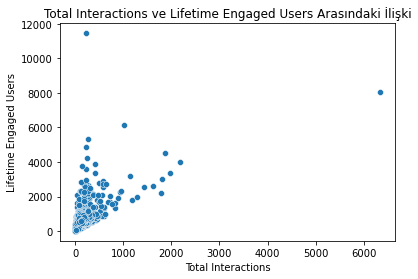

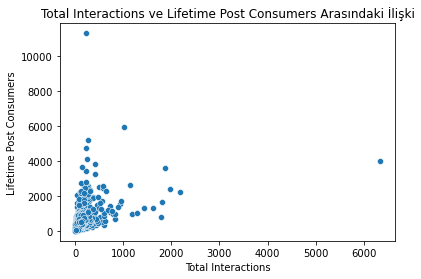

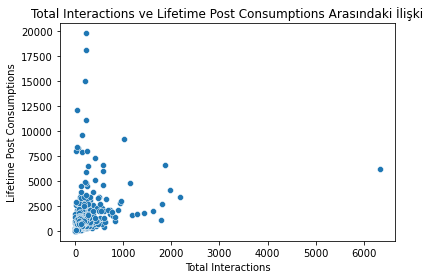

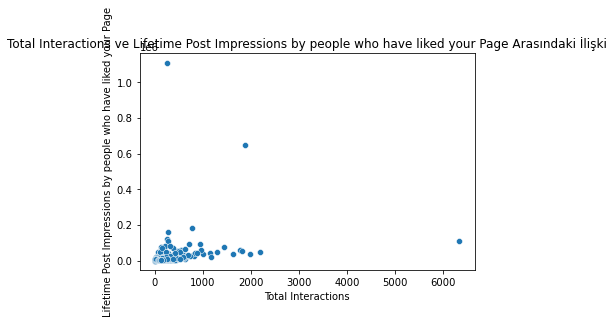

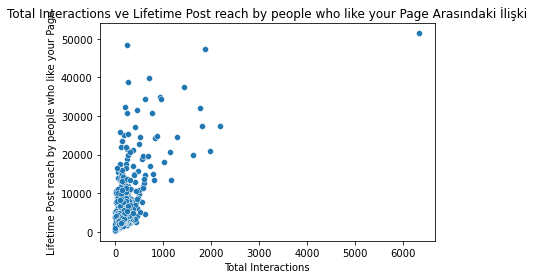

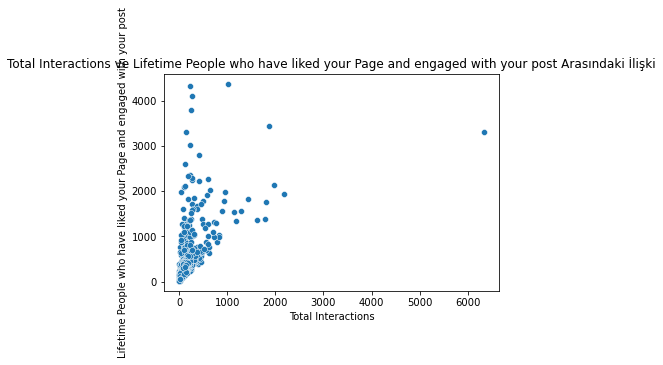

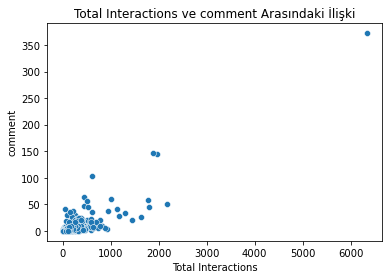

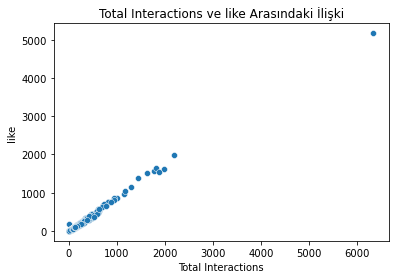

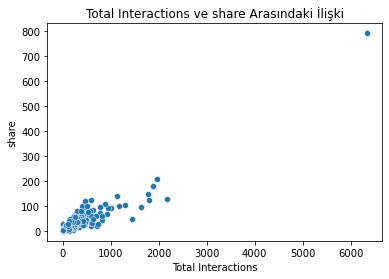

In [40]:
# 'Total Interactions' ile tüm özelliklerin scatter plot ile görselleştirilmesi
for column in data.columns:
    if column != 'Total Interactions':  # 'Total Interactions' özelliğini diğerleriyle karşılaştırma
        sns.scatterplot(x='Total Interactions', y=column, data=data)
        plt.title(f'Total Interactions ve {column} Arasındaki İlişki')
        plt.xlabel('Total Interactions')
        plt.ylabel(column)
        plt.show()

In [41]:
# Kategorik sütunları one-hot encoding ile dönüştürme
X_encoded = pd.get_dummies(data.drop('Total Interactions', axis=1))

# 'Total Interactions'ı hedef değişken olarak belirleme
y = data['Total Interactions']

# Her bir sütun için ayrı bir regresyon modeli oluşturma
for column in X_encoded.columns:
    X = X_encoded[[column]]  # Her sütunu bağımsız değişken olarak seçme

    # Lineer Regresyon modelini oluşturuyoruz ve eğitiyoruz
    model = LinearRegression()
    model.fit(X, y)

    # Model katsayılarını yazdırma
    print(f"Column: {column}")
    print(f"Coefficient: {model.coef_}")
    print("----------------------")


Column: Page total likes
Coefficient: [0.00105686]
----------------------
Column: Category
Coefficient: [56.77012128]
----------------------
Column: Post Month
Coefficient: [2.11064711]
----------------------
Column: Post Weekday
Coefficient: [-15.17579881]
----------------------
Column: Post Hour
Coefficient: [-2.38663474]
----------------------
Column: Paid
Coefficient: [91.37743805]
----------------------
Column: Lifetime Post Total Reach
Coefficient: [0.00900552]
----------------------
Column: Lifetime Post Total Impressions
Coefficient: [0.00169988]
----------------------
Column: Lifetime Engaged Users
Coefficient: [0.22086325]
----------------------
Column: Lifetime Post Consumers
Coefficient: [0.15273933]
----------------------
Column: Lifetime Post Consumptions
Coefficient: [0.04524993]
----------------------
Column: Lifetime Post Impressions by people who have liked your Page
Coefficient: [0.00159037]
----------------------
Column: Lifetime Post reach by people who like your P

<AxesSubplot:>

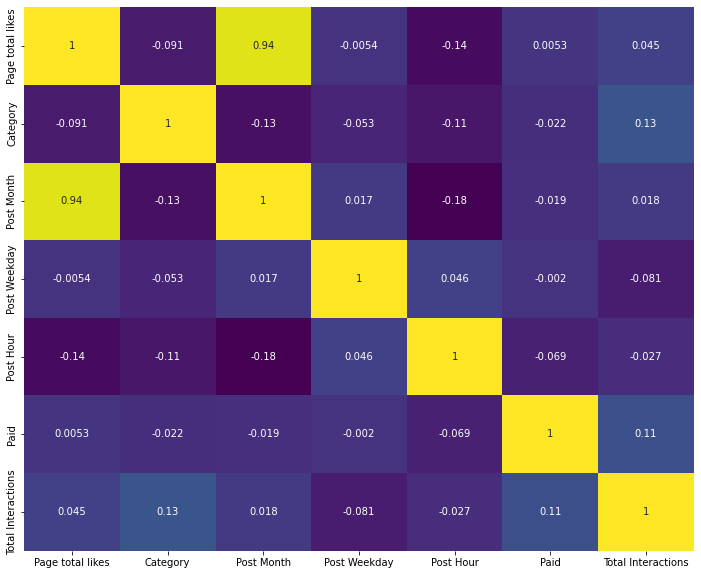

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),cmap='viridis',annot=True,cbar=False)

# EDA of Lifetime Metrics

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 4000.0)

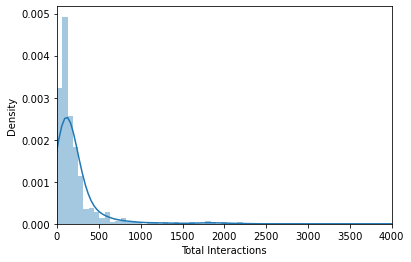

In [17]:
sns.distplot(data['Total Interactions'],bins=100)
plt.xlim(0,4000)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Toplam begenilerin adet sayisi')

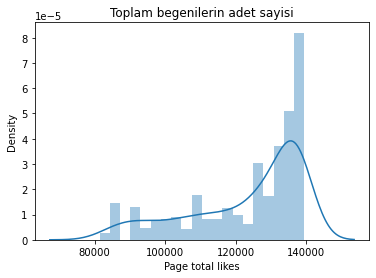

In [48]:
sns.distplot(data['Page total likes'],bins=20)
plt.title("Toplam begenilerin adet sayisi")

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Page Likes')

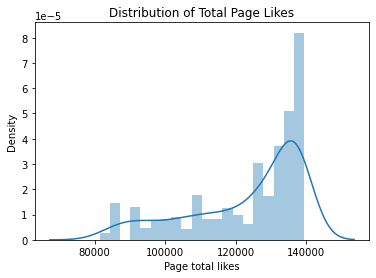

In [46]:
sns.distplot(data['Page total likes'],bins=20)
plt.title("Distribution of Total Page Likes")

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Post Month', ylabel='Density'>

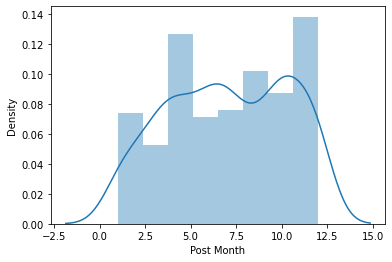

In [19]:
sns.distplot(data['Post Month'])


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Post Weekday', ylabel='Density'>

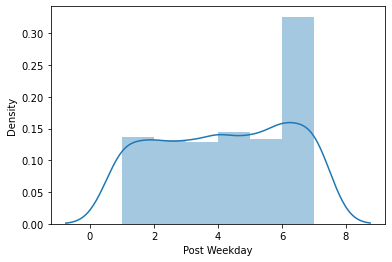

In [22]:
sns.distplot(data['Post Weekday'])


günleri temsil eder genelde postların pazar günü attığı kanısına varabiliriz.

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Post Hour', ylabel='Density'>

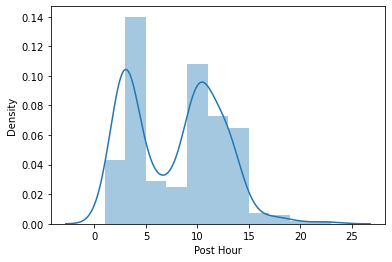

In [24]:
sns.distplot(data['Post Hour'])

In [ ]:
saatleri temsil eder genelde postların saat 10-15 aralığında attığı kanısına varabiliriz.

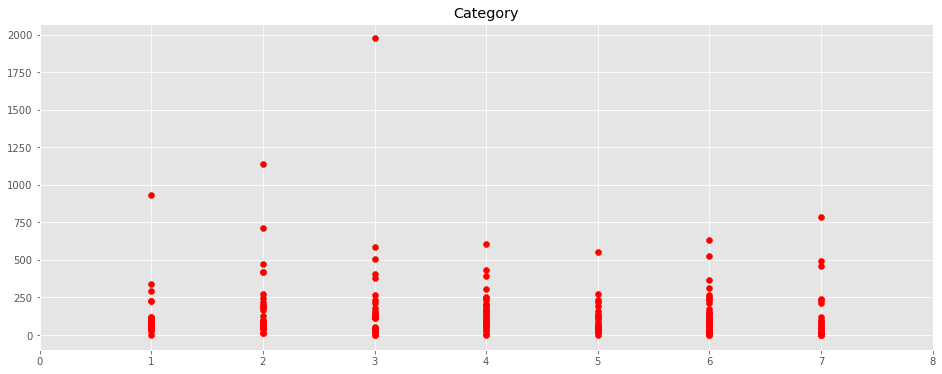

In [25]:
plt.style.use('ggplot')

fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(16, 6))
paid = data[data['Category'] == 1]

ax.scatter(paid['Post Weekday'], paid['Total Interactions'], color='r')
ax.set_title('Category')
ax.set_xlim(0, 8)

plt.show()




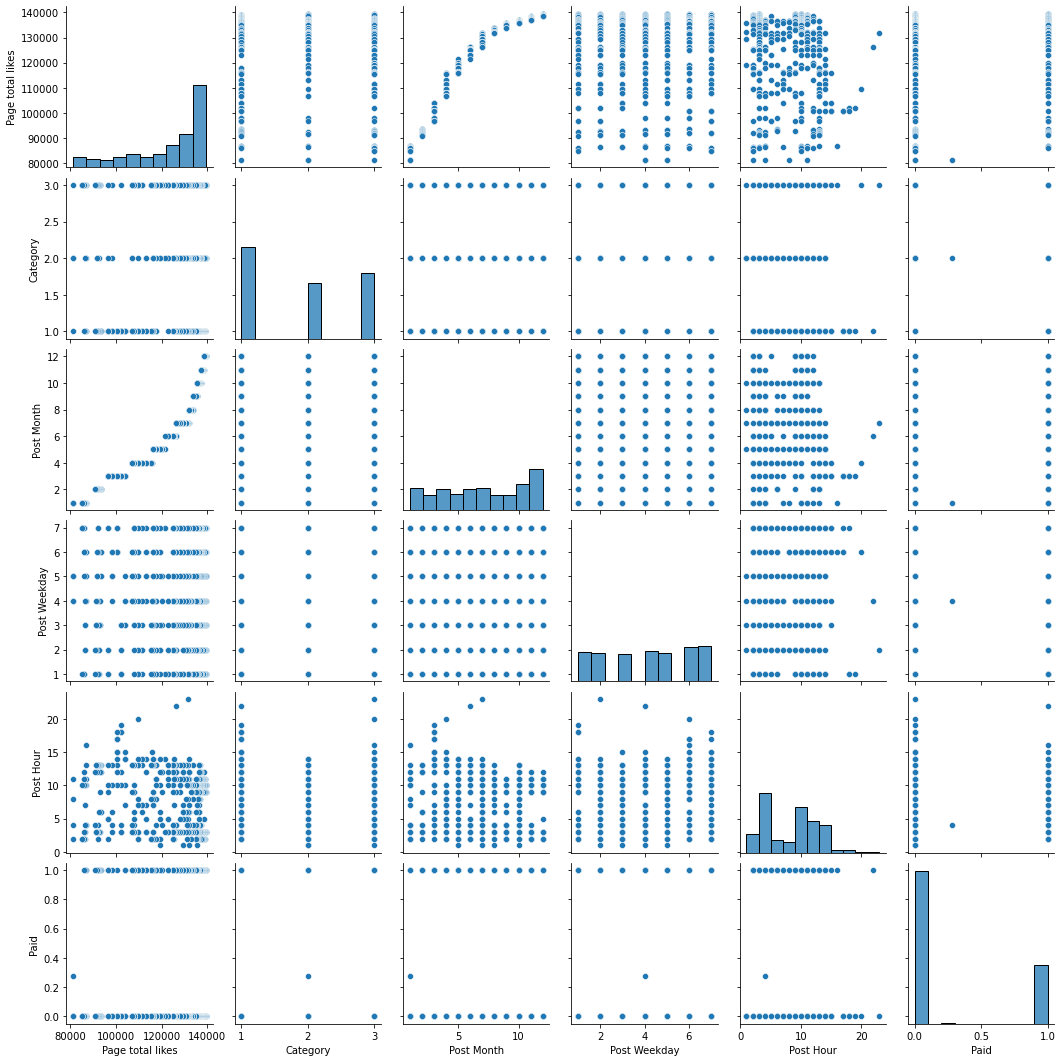

In [26]:
data['Type'] = data['Type'].apply(lambda x: str(x))
plotdf = data.drop(data.columns[7:15],axis =1)
sns.pairplot(data=plotdf)